<a href="https://colab.research.google.com/github/getChan/data_campus/blob/master/NLP/tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Concepts



In [0]:
import tensorflow as tf
import numpy as np

In [29]:
a = tf.placeholder(tf.float32, shape=[3,4])
b = tf.placeholder(tf.float32, shape=[4,6])


op = tf.matmul(a, b)

a_mat = np.random.randn(3,4)
b_mat = np.random.randn(4,6)

with tf.Session() as sess:
  print(sess.run(op, feed_dict={a:a_mat, b:b_mat}))

[[ 0.5456903  -0.8009943  -0.6600466   0.27159917 -0.12338307 -0.71377426]
 [ 1.890008    1.060418    0.55130184 -0.46573135 -0.7733471  -0.49385256]
 [-1.0697331   3.002978    0.03745753 -1.3840796  -0.02584723  1.3906353 ]]


In [30]:


W = tf.Variable([0.3], dtype=tf.float32)
b = tf.Variable([-0.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)

linear_model = x*W + b

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init_op)
  print(sess.run(linear_model, feed_dict={x:5.0}))

[1.2]


# Logistic Regression

In [0]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

x_test_data = [[1,1], [5,4], [2,1], [6,3]]
y_test_data = [[0], [1], [0], [1]]

In [0]:
# placeholders for a tensor that will be always fed.
x = tf.placeholder(tf.float32, shape=[None, 2], name="x_ph")
y = tf.placeholder(tf.float32, shape=[None, 1], name="y_ph")

In [0]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [0]:
# Hypothesis using sigmoid
hypothesis = tf.sigmoid(tf.matmul(x, W) + b)

# cost/loss function
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) # boolean to float32
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [35]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={x: x_data, y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    hypothesis_val, pred_val, acc_val = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={x: x_test_data, y: y_test_data})
    print("\nHypothesis: ", hypothesis_val, "\nCorrect : ", pred_val, "\nAccuracy: ", acc_val)

0 1.3485712
200 0.58159083
400 0.5103544
600 0.47224438
800 0.44703197
1000 0.42762554
1200 0.41122702
1400 0.39661315
1600 0.38320163
1800 0.3706942
2000 0.35892662
2200 0.34780017
2400 0.3372502
2600 0.32722977
2800 0.31770208
3000 0.30863592
3200 0.3000035
3400 0.29177985
3600 0.28394145
3800 0.2764664
4000 0.269334
4200 0.26252502
4400 0.25602093
4600 0.24980448
4800 0.24385971
5000 0.23817115
5200 0.23272456
5400 0.22750641
5600 0.22250421
5800 0.21770601
6000 0.21310067
6200 0.20867777
6400 0.20442764
6600 0.20034109
6800 0.19640946
7000 0.19262482
7200 0.18897943
7400 0.18546633
7600 0.18207884
7800 0.17881067
8000 0.17565607
8200 0.17260928
8400 0.16966529
8600 0.16681916
8800 0.16406633
9000 0.16140242
9200 0.15882336
9400 0.15632527
9600 0.15390454
9800 0.15155776
10000 0.14928168

Hypothesis:  [[0.02255697]
 [0.9552605 ]
 [0.09132387]
 [0.985479  ]] 
Correct :  [[0.]
 [1.]
 [0.]
 [1.]] 
Accuracy:  1.0


# MNIST

In [0]:
import math
import random
import matplotlib.pyplot as plt
from datetime import datetime

from tensorflow.examples.tutorials.mnist import input_data

W0731 02:11:45.268595 140584050575232 deprecation.py:323] From <ipython-input-37-7950cd9991ba>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0731 02:11:45.271201 140584050575232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0731 02:11:45.273234 140584050575232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


W0731 02:11:50.694501 140584050575232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0731 02:11:50.697831 140584050575232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0731 02:11:50.807501 140584050575232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


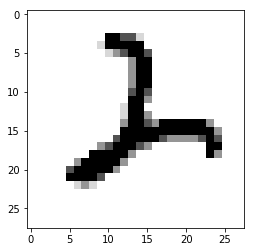

In [37]:
mnist = input_data.read_data_sets("./data", one_hot=True)
r = random.randint(0, mnist.train.num_examples - 1)
plt.imshow(mnist.train.images[r:r+1].reshape(28, 28),
           cmap='Greys', interpolation='nearest')
plt.show()

In [0]:
# PLACEHOLDERS
model_inputs = tf.placeholder(dtype=tf.float32, shape=[None, 784])
labels = tf.placeholder(dtype=tf.float32, shape=[None, 10])
global_step = tf.Variable(0, name='global_step', trainable=False)

In [45]:
# VARIABLES
w = tf.Variable(tf.random_normal(shape=[784, 10]))
b = tf.Variable(tf.random_normal(shape=[10]))

tf.summary.histogram('weights', w)

<tf.Tensor 'weights:0' shape=() dtype=string>

In [0]:
logits = tf.matmul(model_inputs, w) + b
predictions = tf.nn.softmax(logits)

In [0]:
# PREDICTION
compare_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
# ACCURACY
accuracy = tf.reduce_mean(tf.cast(compare_pred, "float"))
# COST FUNCTION
loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(predictions), reduction_indices=1))
# OPTIMIZER, TRAIN OPERATION
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss, global_step=global_step)

merged = tf.summary.merge_all()

In [0]:
with tf.Session() as sess:
  timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
  writer = tf.summary.FileWriter('./logs/%s' % timestamp, sess.graph)
  saver = tf.train.Saver()
  sess.run(tf.global_variables_initializer())

  for i in range(50):
      avg_loss = 0.
      for step in range(10000):
        batch_images, batch_labels = mnist.train.next_batch(100)
        feeds_train = {model_inputs: batch_images, labels: batch_labels}
        _, loss_val, global_step_val, summary_val = sess.run([train_op, loss, global_step, merged], feed_dict=feeds_train)
        avg_loss += loss_val

        if (step+1) % 1000 == 0:
          print ("step {} | loss : {}".format(step+1, avg_loss/(step+1)))
          writer.add_summary(summary_val, global_step=global_step_val)


      feeds_test = {model_inputs: mnist.test.images, labels: mnist.test.labels}
      train_acc = sess.run(accuracy, feed_dict=feeds_train)
      test_acc = sess.run(accuracy, feed_dict=feeds_test)
      print("idx: %02d/50 cost: %.3f train_acc: %.3f test_acc: %.3f"
            % (i+1, avg_loss/(step+1), train_acc, test_acc))

step 1000 | loss : 5.984980409383774
step 2000 | loss : 4.453757867872715
step 3000 | loss : 3.661552770058314
step 4000 | loss : 3.1686693378984927
step 5000 | loss : 2.8301997478961947
step 6000 | loss : 2.578509818583727
step 7000 | loss : 2.3845245963931085
step 8000 | loss : 2.2294184336550535
step 9000 | loss : 2.1012576860520573
step 10000 | loss : 1.9939224125683308
idx: 01/50 cost: 1.994 train_acc: 0.800 test_acc: 0.805
step 1000 | loss : 0.9743457005023957
step 2000 | loss : 0.9616040303111076
step 3000 | loss : 0.943552336126566
step 4000 | loss : 0.9285133202672005
step 5000 | loss : 0.9140960409462452
step 6000 | loss : 0.9005217824156085
step 7000 | loss : 0.8882751457584755
step 8000 | loss : 0.8758806449361145
step 9000 | loss : 0.8655075064897537
step 10000 | loss : 0.8551829385772347
idx: 02/50 cost: 0.855 train_acc: 0.790 test_acc: 0.846
step 1000 | loss : 0.7442027658820153
step 2000 | loss : 0.7400814957097173
step 3000 | loss : 0.7321368755201498
step 4000 | loss 

In [0]:
## GPU 사용
import os
os.envirom['CUDA_VISIBLE_DEVICEES']= "2" 
os.envirom['CUDA_VISIBLE_DEVICEES']= "1, 2" ## 여러개 사용, 소스를 직접 짜야 한다.

os.envirom['CUDA_VISIBLE_DEVICEES']= "-1" ## CPU 사용 
